In [2]:
import pandas as pd 
heart = pd.read_csv("heart.csv")
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [39]:
print(heart["Sex"].value_counts()['M'])
print(heart["Sex"].value_counts()['F'])

mean_cholesterol_with_heart_disease = heart.loc[heart["HeartDisease"] == 1, "Cholesterol"].mean()
mean_cholesterol_without_heart_disease = heart.loc[heart["HeartDisease"] == 0, "Cholesterol"].mean()
hdbp = heart.loc[heart["HeartDisease"] == 1, "RestingBP"].mean()
nhdbp = heart.loc[heart["HeartDisease"] == 0, "RestingBP"].mean()
total = heart["RestingBP"].mean()



#print(hdbp)
#print(nhdbp)
print(total)

ModeECG = heart["RestingECG"].mode()
Mode = heart["ST_Slope"].mode()
print(ModeECG)
print(Mode)
print()

725
193
132.39651416122004
0    Normal
Name: RestingECG, dtype: object


In [5]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [167]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
print(heart['Sex'].unique())
print(heart['ChestPainType'].unique())
print(heart['RestingECG'].unique())
print(heart['ExerciseAngina'].unique())
print(heart['ST_Slope'].unique())
print(heart['HeartDisease'].unique())

['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']
[0 1]


In [8]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output = False).set_output(transform='pandas')
sex_transform = ohe.fit_transform(heart[['Sex']])
exercise_angina_transform = ohe.fit_transform(heart[['ExerciseAngina']])
sex_transform





,Sex_F,Sex_M
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
913,0.0,1.0
914,0.0,1.0
915,0.0,1.0
916,1.0,0.0


In [9]:
heart = pd.concat([heart, sex_transform, exercise_angina_transform ], axis=1).drop(columns = ['Sex','ExerciseAngina'])
heart

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y
0,40,ATA,140,289,0,Normal,172,0.0,Up,0,0.0,1.0,1.0,0.0
1,49,NAP,160,180,0,Normal,156,1.0,Flat,1,1.0,0.0,1.0,0.0
2,37,ATA,130,283,0,ST,98,0.0,Up,0,0.0,1.0,1.0,0.0
3,48,ASY,138,214,0,Normal,108,1.5,Flat,1,1.0,0.0,0.0,1.0
4,54,NAP,150,195,0,Normal,122,0.0,Up,0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,TA,110,264,0,Normal,132,1.2,Flat,1,0.0,1.0,1.0,0.0
914,68,ASY,144,193,1,Normal,141,3.4,Flat,1,0.0,1.0,1.0,0.0
915,57,ASY,130,131,0,Normal,115,1.2,Flat,1,0.0,1.0,0.0,1.0
916,57,ATA,130,236,0,LVH,174,0.0,Flat,1,1.0,0.0,1.0,0.0


In [10]:


cholesterol_max = max(heart['Cholesterol'])
cholesterol_min = min(heart['Cholesterol'])
cholesterol = (heart['Cholesterol'] - cholesterol_min)/(cholesterol_max - cholesterol_min)
cholesterol

0      0.479270
1      0.298507
2      0.469320
3      0.354892
4      0.323383
         ...   
913    0.437811
914    0.320066
915    0.217247
916    0.391376
917    0.290216
Name: Cholesterol, Length: 918, dtype: float64

In [11]:
BP_max = max(heart['RestingBP'])
BP_min = min(heart['RestingBP'])
normalized_BP = (heart['RestingBP'] - BP_min)/(BP_max - BP_min)
normalized_BP.head(30)

0     0.700
1     0.800
2     0.650
3     0.690
4     0.750
5     0.600
6     0.650
7     0.550
8     0.700
9     0.600
10    0.650
11    0.680
12    0.600
13    0.700
14    0.575
15    0.600
16    0.550
17    0.600
18    0.500
19    0.600
20    0.500
21    0.600
22    0.620
23    0.750
24    0.650
25    0.650
26    0.620
27    0.600
28    0.565
29    0.625
Name: RestingBP, dtype: float64

In [12]:
HR_max = max(heart['MaxHR'])
HR_min = min(heart['MaxHR'])
normalized_HR = (heart['MaxHR'] - HR_min)/(HR_max - HR_min)
normalized_HR.head(30)

0     0.788732
1     0.676056
2     0.267606
3     0.338028
4     0.436620
5     0.774648
6     0.774648
7     0.577465
8     0.492958
9     0.422535
10    0.577465
11    0.274648
12    0.598592
13    0.563380
14    0.542254
15    0.633803
16    0.746479
17    0.739437
18    0.457746
19    0.704225
20    0.577465
21    0.577465
22    0.732394
23    0.633803
24    0.549296
25    0.830986
26    0.366197
27    0.408451
28    0.471831
29    0.598592
Name: MaxHR, dtype: float64

In [13]:
Age_max = max(heart['Age'])
Age_min = min(heart['Age'])
normalized_Age = (heart['Age'] - Age_min)/(Age_max - Age_min)
normalized_Age

0      0.244898
1      0.428571
2      0.183673
3      0.408163
4      0.530612
         ...   
913    0.346939
914    0.816327
915    0.591837
916    0.591837
917    0.204082
Name: Age, Length: 918, dtype: float64

Text(0.5, 1.0, 'Scatter Plot of Cholesterol vs. Age')

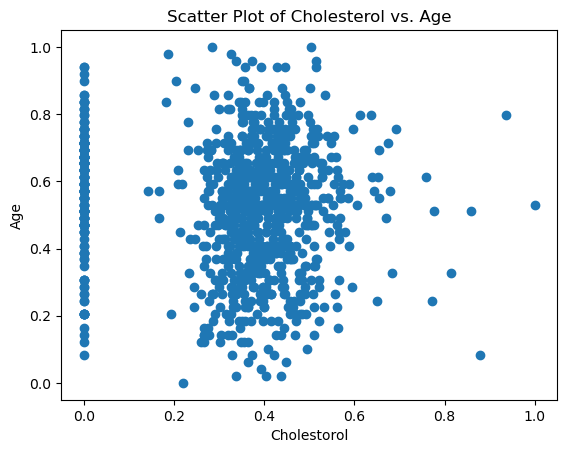

In [178]:
import matplotlib.pyplot as plt
plt.scatter(normalized_cholesterol, normalized_Age)
plt.xlabel('Cholestorol')
plt.ylabel('Age')
plt.title('Scatter Plot of Cholesterol vs. Age')

Text(0.5, 1.0, 'Scatter Plot of Cholesterol vs. Resting Blood Pressure')

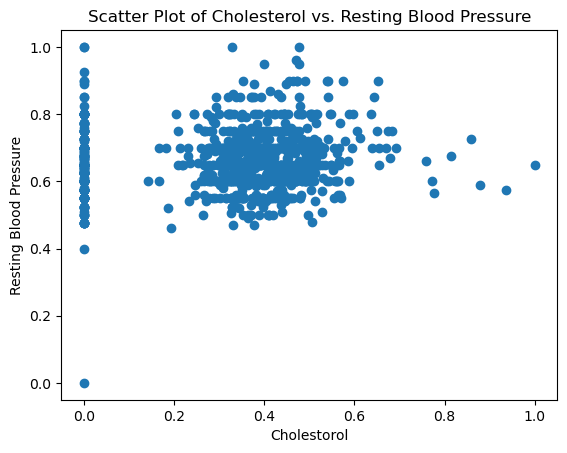

In [183]:
plt.scatter(normalized_cholesterol, normalized_BP)
plt.xlabel('Cholesterol')
plt.ylabel('Resting Blood Pressure')
plt.title('Scatter Plot of Cholesterol vs. Resting Blood Pressure')

#plt.scatter(normalized_cholesterol, normalized_HR)

Text(0.5, 1.0, 'Scatter Plot of Cholesterol vs. Resting Blood Pressure')

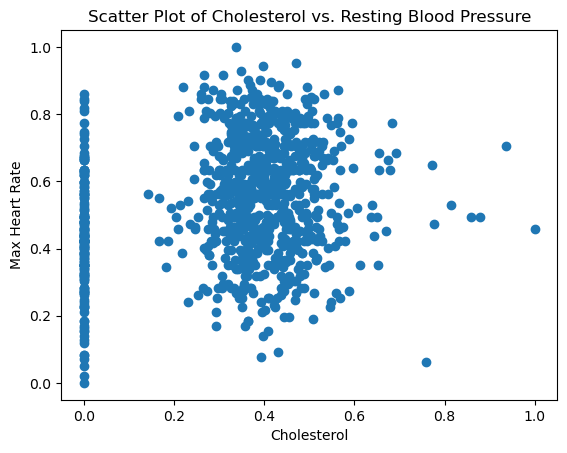

In [184]:
plt.scatter(normalized_cholesterol, normalized_HR)
plt.xlabel('Cholesterol')
plt.ylabel('Max Heart Rate')
plt.title('Scatter Plot of Cholesterol vs. Resting Blood Pressure')

Text(0.5, 1.0, 'Scatter Plot of Rested Blood Pressure vs. Max Heart Rate')

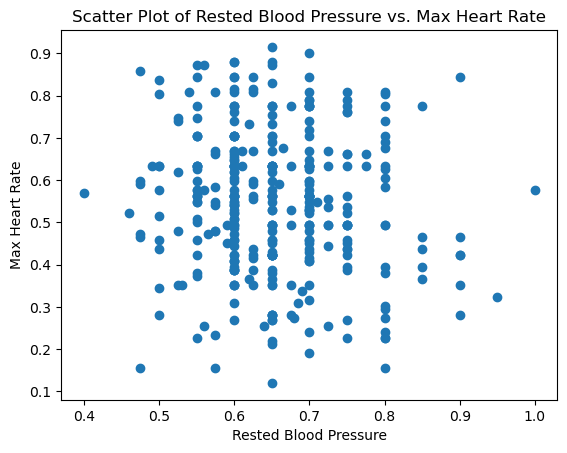

In [171]:
#plt.scatter(normalized_BP.head(350), normalized_HR.head(350))
plt.xlabel('Rested Blood Pressure')
plt.ylabel('Max Heart Rate')
plt.title('Scatter Plot of Rested Blood Pressure vs. Max Heart Rate')

Text(0.5, 1.0, 'Scatter Plot of Age vs. Max Heart Rate')

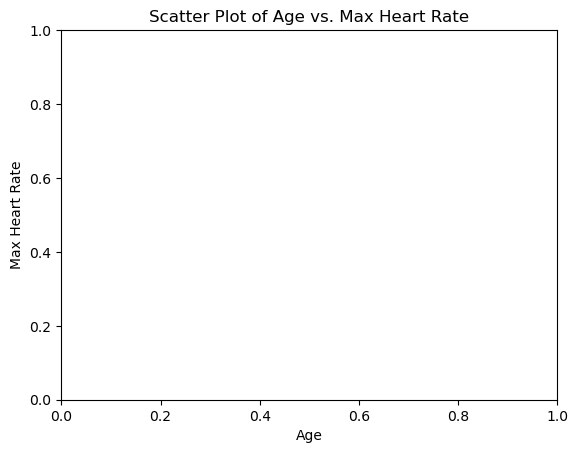

In [186]:
#plt.scatter(normalized_Age.head(200), normalized_HR.head(200))
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('Scatter Plot of Age vs. Max Heart Rate')
#plt.show()

In [187]:
HD_max = max(heart['HeartDisease'])
HD_min = min(heart['HeartDisease'])
normalized_HD = (heart['HeartDisease'] - HD_min)/(HD_max - HD_min)
normalized_HD

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
913    1.0
914    1.0
915    1.0
916    1.0
917    0.0
Name: HeartDisease, Length: 918, dtype: float64

<BarContainer object of 918 artists>

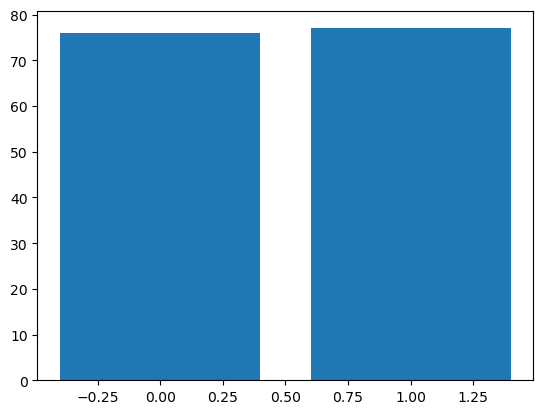

In [175]:
plt.bar(heart['HeartDisease'], heart['Age'])

In [112]:
pearson_corr = heart['Cholesterol'].corr(heart['HeartDisease'] == 1)
print("correlation coefficient for relation of Cholestorol on Heart Disease:", pearson_corr)


correlation coefficient for relation of Cholestorol on Heart Disease: -0.23274063892701183


correlation coefficient for relation of Cholestorol on Heart Disease: 0.23274063892701183


In [68]:
pearson_corr = heart['Age'].corr(heart['HeartDisease'])
print("correlation coefficient for relation of Age on Heart Disease:", pearson_corr)

correlation coefficient for relation of Age on Heart Disease: 0.2820385058189973


In [173]:
# Females correlated with HeartDisease
pearson_corr = heart['HeartDisease'].corr(sex_transform['Sex_F'] == 1)
pearson_corr

-0.3054449159631403

In [15]:
# Males correlated with heartDisease
pearson_corr = heart['HeartDisease'].corr(sex_transform['Sex_M'] == 1)
pearson_corr

0.3054449159631403

In [40]:
#Correlation for Cholesterol on Heart Disease  
pearson_corr = heart['Cholesterol'].corr(heart['HeartDisease'] == 1)
pearson_corr

-0.23274063892701183